In [1]:
pip  install transformers==4.22.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00


In [2]:
import transformers

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [3]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 47.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.3-py3-none-any.whl size=25314034 sha256

In [4]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med', 'sci.space', 'rec.sport.baseball']

In [6]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [7]:
test = fetch_20newsgroups(
    subset = 'test',
    categories = categories,
    shuffle = True,
    random_state = 0
)

## Preprocessing of the dataset

In [8]:
train_text = train.data

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Download the stopwords corpus from NLTK if not already downloaded
nltk.download('stopwords')

# Load the stopwords corpus
stop_words = set(stopwords.words('english'))

def preprocess_text(train_text):
    # Remove email IDs
    train_text = re.sub(r'\S+@\S+', '', train_text)

    # Remove URLs
    train_text = re.sub(r'http\S+', '', train_text)

    # Remove special characters
    train_text = re.sub(r'[^\w\s]', '', train_text)

    # Convert to lowercase
    train_text = train_text.lower()

    # Tokenize the text into individual words
    words = train_text.split()

    # Remove stopwords
    words = [w for w in words if w not in stop_words]

    # Join the remaining words back into a string
    train_text = ' '.join(words)

    return train_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
test_text = test.data

In [11]:


def preprocess_text(test_text):
    # Remove email IDs
    test_text = re.sub(r'\S+@\S+', '', test_text)

    # Remove URLs
    test_text = re.sub(r'http\S+', '', test_text)

    # Remove special characters and punctuation
    test_text = re.sub(r'[^\w\s]', '', test_text)

    # Convert to lowercase
    test_text = test_text.lower()

    # Tokenize the text into individual words
    words = test_text.split()

    # Remove stopwords
    words = [w for w in words if w not in stop_words]

    # Join the remaining words back into a string
    test_text = ' '.join(words)

    return test_text


In [12]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [13]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'sci.space',
 'soc.religion.christian']

In [18]:
X_train = train_text
y_train = train.target

X_test = test_text
y_test = test.target

In [19]:
len(X_train), len(X_test)

(3447, 2293)

In [20]:
# Build ML Model with Transformer

In [22]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512, class_names=categories)

In [23]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 292
	95percentile : 822
	99percentile : 1882


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 315
	95percentile : 828
	99percentile : 2362


In [24]:
model = trans.get_classifier()

In [25]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
215/215 [==============================] - 206s 897ms/step - loss: 1.7699 - accuracy: 0.2544
Epoch 2/5
215/215 [==============================] - 193s 900ms/step - loss: 0.6191 - accuracy: 0.8846
Epoch 3/5
215/215 [==============================] - 193s 896ms/step - loss: 1.3641 - accuracy: 0.4401
Epoch 4/5
215/215 [==============================] - 183s 849ms/step - loss: 1.7973 - accuracy: 0.1734
Epoch 5/5
215/215 [==============================] - 162s 753ms/step - loss: 2.1570 - accuracy: 0.1720


done.
Visually inspect loss plot and select learning rate associated with falling loss


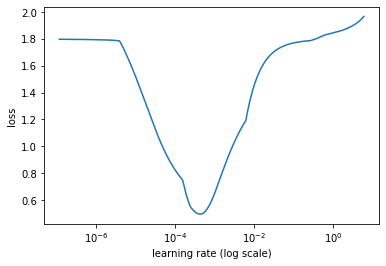

In [16]:
learner.lr_find(show_plot = True, max_epochs = 5)

In [26]:
learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
216/216 [==============================] - 250s 1s/step - loss: 0.6987 - accuracy: 0.8349 - val_loss: 0.2084 - val_accuracy: 0.9420
Epoch 2/5
216/216 [==============================] - 238s 1s/step - loss: 0.1398 - accuracy: 0.9623 - val_loss: 0.2794 - val_accuracy: 0.9246
Epoch 3/5
216/216 [==============================] - 238s 1s/step - loss: 0.1191 - accuracy: 0.9687 - val_loss: 0.2538 - val_accuracy: 0.9341
Epoch 4/5
216/216 [==============================] - 238s 1s/step - loss: 0.0546 - accuracy: 0.9875 - val_loss: 0.2064 - val_accuracy: 0.9494
Epoch 5/5
216/216 [==============================] - 238s 1s/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.2180 - val_accuracy: 0.9494


In [27]:
learner.validate()

72/72 [==============================] - 46s 623ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       319
           1       0.93      0.95      0.94       389
           2       0.98      0.96      0.97       397
           3       0.95      0.96      0.96       396
           4       0.95      0.96      0.95       394
           5       0.96      0.95      0.96       398

    accuracy                           0.95      2293
   macro avg       0.95      0.95      0.95      2293
weighted avg       0.95      0.95      0.95      2293



array([[286,   4,   2,   6,   9,  12],
       [  5, 370,   2,   2,   9,   1],
       [  2,   6, 383,   4,   1,   1],
       [  5,   7,   2, 382,   0,   0],
       [  4,   8,   0,   3, 378,   1],
       [ 14,   1,   1,   3,   1, 378]])

In [28]:
learner.view_top_losses(n=5, preproc=trans)

72/72 [==============================] - 44s 610ms/step
----------
id:719 | loss:8.53 | true:comp.graphics | pred:alt.atheism)

----------
id:1352 | loss:8.09 | true:sci.space | pred:sci.med)

----------
id:1053 | loss:8.04 | true:alt.atheism | pred:sci.space)

----------
id:1111 | loss:8.02 | true:soc.religion.christian | pred:alt.atheism)

----------
id:1995 | loss:7.94 | true:rec.sport.baseball | pred:sci.med)



In [29]:
# Predict category on new data

In [30]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [31]:
X = 'Indian developed covid-19 vacacines is performing the best among its peers from around the globe, saving millions from the deadly corona virus and building defensive immune against it.'

In [32]:
predictor.predict(X)

1/1 [==============================] - 0s 74ms/step


'sci.med'

In [35]:
X=test_text[10]

In [36]:
predictor.predict(X)

1/1 [==============================] - 0s 100ms/step


'sci.space'